#LinearRegression


In [3]:
import matplotlib.pyplot as plt #데이터 시각화
import pandas as pd #CSV 데이터 불러와 활용
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
dataset = pd.read_csv('csv/score.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [ ]:
X = dataset.iloc[:, :-1].values #독립변수
y = dataset.iloc[:, -1].values #종속변수

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.predict(X_train)

array([ 26.45446869,   4.55534508,  62.95300803,  40.01106902,
        18.11194541,  71.29553131, 103.62280902,  74.42397754,
        59.8245618 ,  54.61048475,  11.85505295,  46.26796148,
        86.93776246,  63.99582344,  32.71136115,  24.36883787])

#시각화

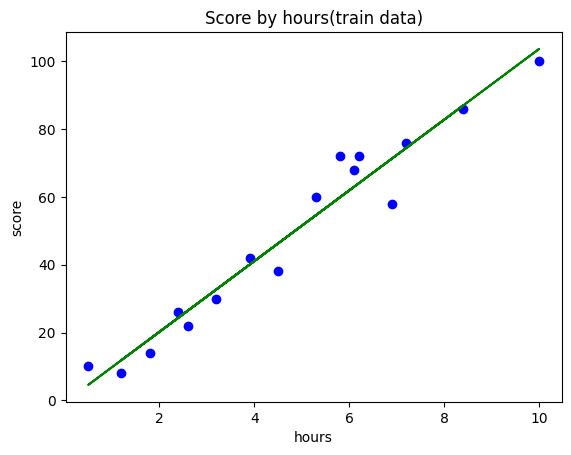

In [ ]:
plt.scatter(X_train, y_train, color='blue') #산점도 확인
plt.plot(X_train, reg.predict(X_train), color='green') #선그래프
plt.title('Score by hours(train data)') #제목
plt.xlabel('hours') #X축 이름
plt.ylabel('score') #y축 이름
plt.show()

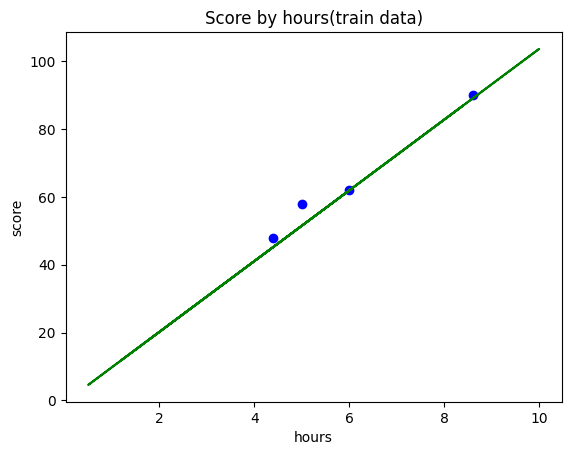

In [ ]:
#테스트 세트는 학습할때 사용하지 않았음
plt.scatter(X_test, y_test, color='blue') #산점도

plt.plot(X_train, reg.predict(X_train), color='green') #선그래프
plt.title('Score by hours(train data)') #제목
plt.xlabel('hours') #X축 이름
plt.ylabel('score') #y축 이름
plt.show()

#SGD


In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sr = SGDRegressor(max_iter=1000, eta0=1e-4, random_state=0, verbose=1)
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.31, NNZs: 1, Bias: 0.050705, T: 16, Avg. loss: 1537.507611
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.52, NNZs: 1, Bias: 0.084450, T: 32, Avg. loss: 1461.523079
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.70, NNZs: 1, Bias: 0.113522, T: 48, Avg. loss: 1403.608560
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.87, NNZs: 1, Bias: 0.139855, T: 64, Avg. loss: 1353.646149
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 1, Bias: 0.164155, T: 80, Avg. loss: 1308.574203
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 1.16, NNZs: 1, Bias: 0.186913, T: 96, Avg. loss: 1267.472322
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 1.29, NNZs: 1, Bias: 0.208364, T: 112, Avg. loss: 1229.440037
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 1.42, NNZs: 1, Bias: 0.228758, T: 128, Avg. loss: 1194.045880
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 1.54, NNZs: 1, Bias: 0.248253, T: 144, Avg. loss: 1160.760332
Total training 

SGDRegressor(eta0=0.0001, random_state=0, verbose=1)

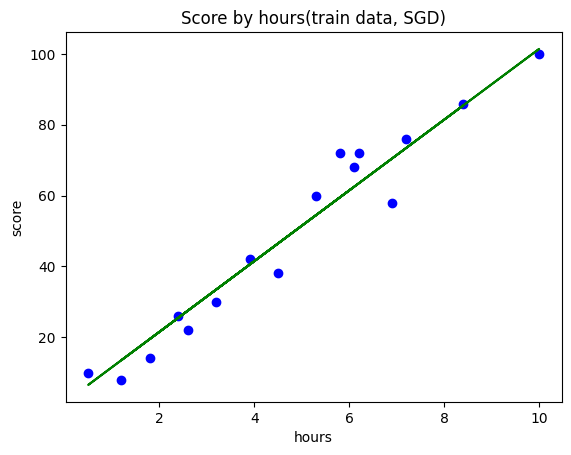

In [ ]:
plt.scatter(X_train, y_train, color='blue') #산점도
plt.plot(X_train, sr.predict(X_train), color='green') #선그래프
plt.title('Score by hours(train data, SGD)') #제목
plt.xlabel('hours') #X축 이름
plt.ylabel('score') #y축 이름
plt.show()

In [ ]:
sr.score(X_test, y_test)

0.9426485799911358

In [ ]:
sr.score(X_train, y_train)

0.9485376095578657

#classifier


In [ ]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


#에포크와 과대/과소적합

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

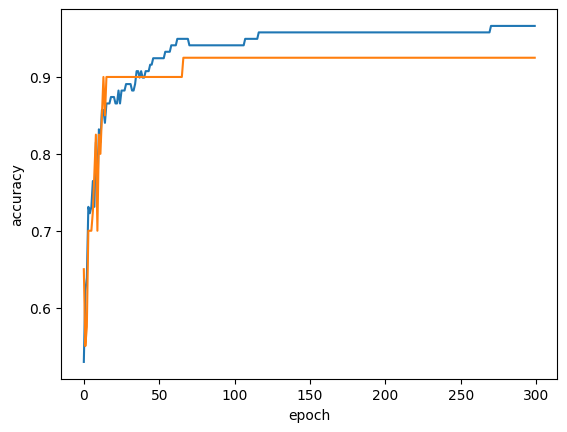

In [ ]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
